# Linear Regression Assignment

*Prafful Agrawal*  
*01/02/2021*

### Problem Statement

Build a linear regression model using *scikit learn* in **boston data** to predict 'Price' based on other dependent variable. 

### Solution

The analysis has been divided into the following steps:

1. Data Import
2. Exploratory Data Analysis
3. Data Preprocessing and Transformation
4. Model Development
5. Model Selection and Verification
6. Conclusion

Let us import the required packages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
import statsmodels.formula.api as smf

Now, load the *Boston Data* as a Pandas Dataframe.

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
y = pd.Series(boston_data.target, name='MEDV')
data = X.join(y)

Look at the first few rows.

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The description of the data is as given below:

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

There are **13 independent variables** which can be used to predict the **dependent variable** `MEDV`. There are a total of 506 observations.

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The variables `CHAS` and `RAD` are categorical variables while the rest are numerical variables.

Let us check for missing values.

In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

It seems that there are no missing values in our data.

Let us look at the distribution of data:

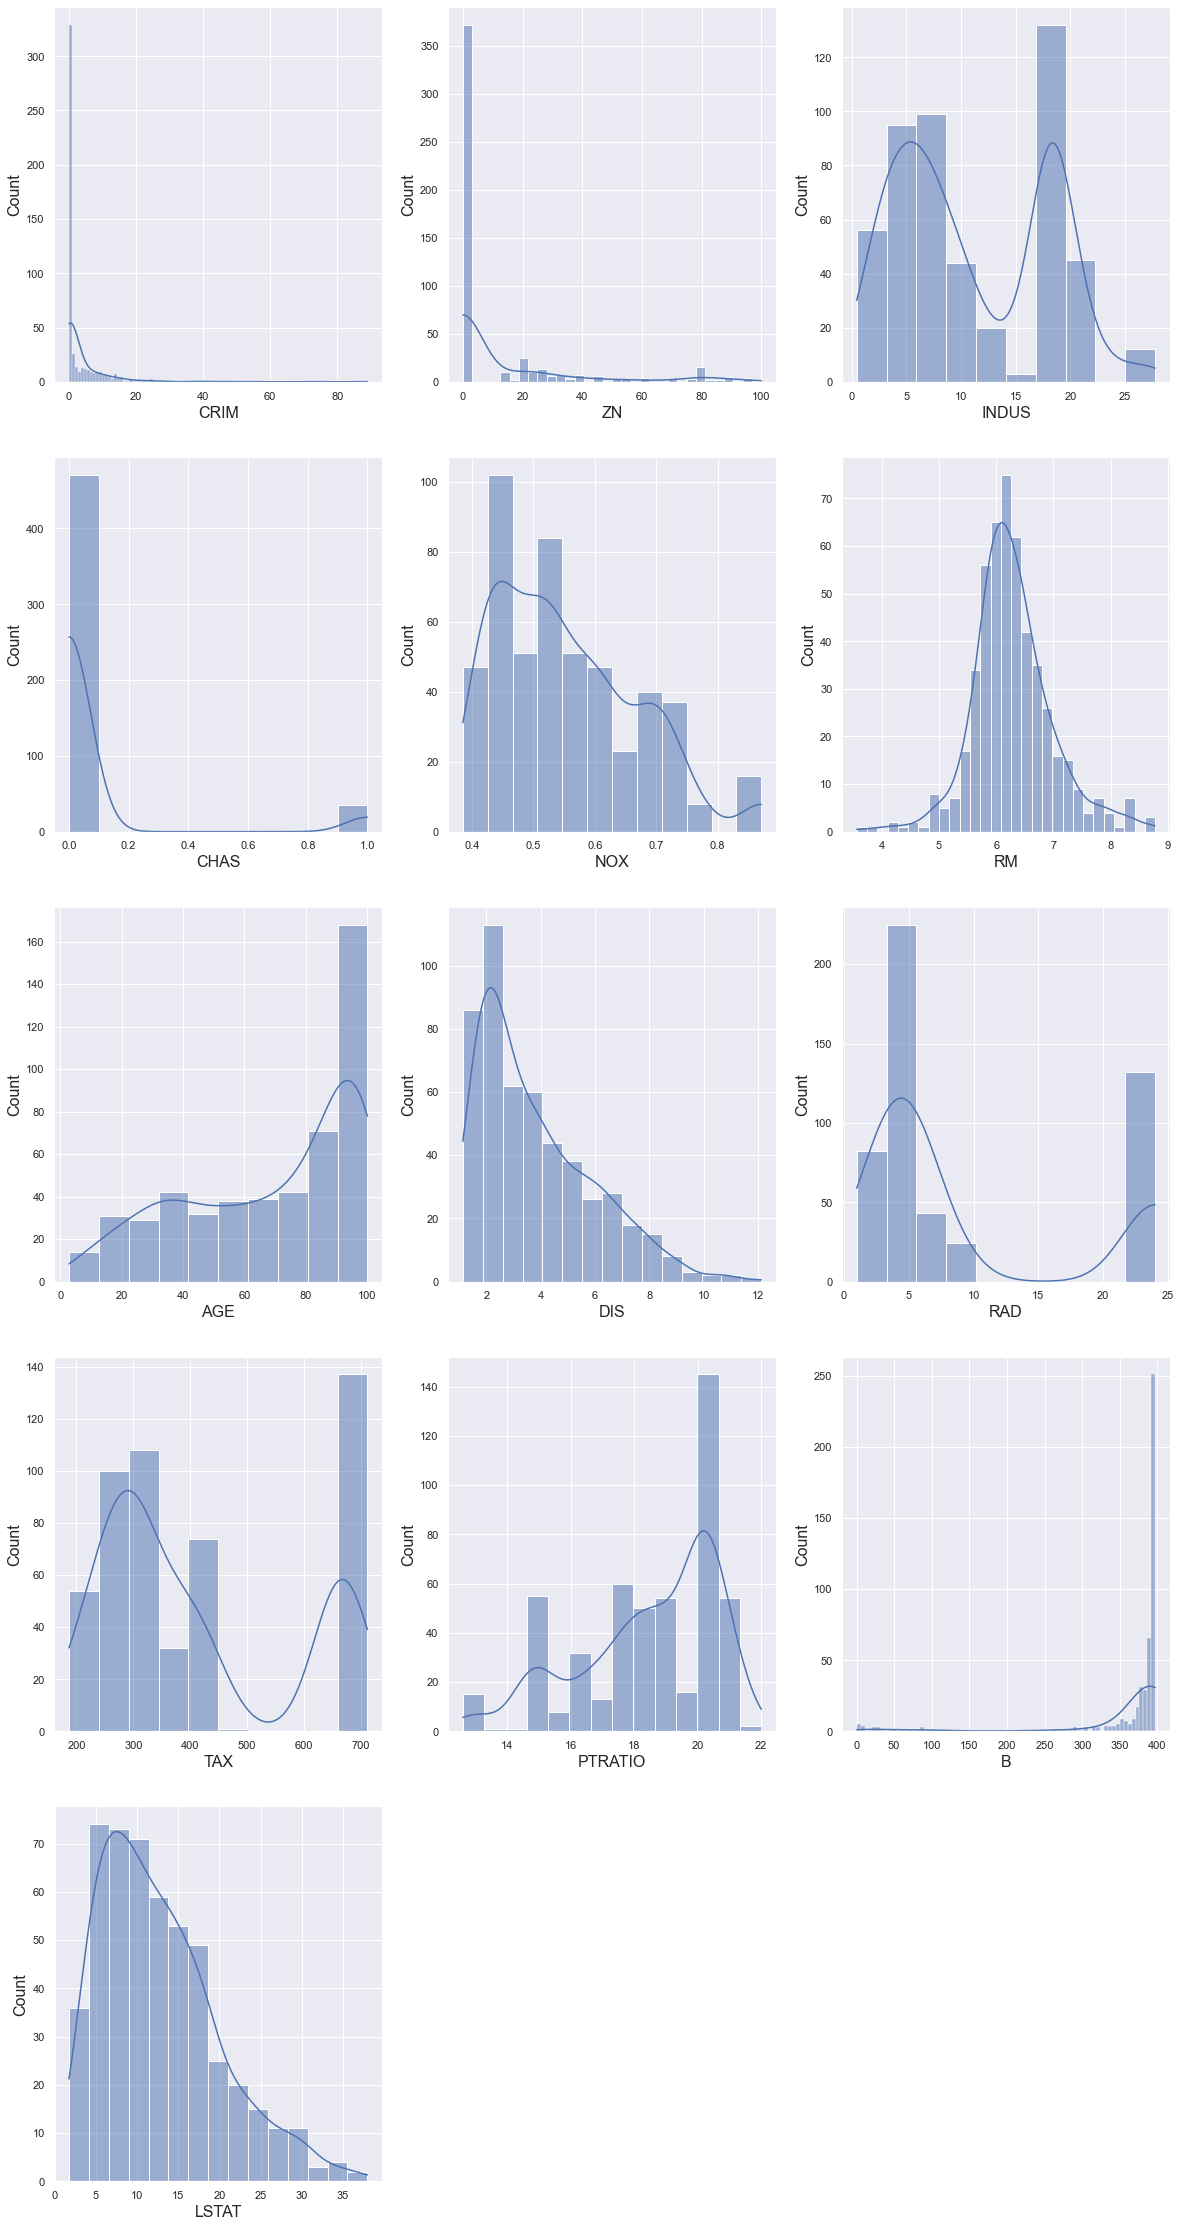

In [7]:
plt.figure(figsize = (20, 40))
plotnumber = 1
for column in data.columns[:-1]:
    ax = plt.subplot(5, 3, plotnumber)
    sns.histplot(data = data[column], stat = 'count', kde = True)
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plotnumber += 1
plt.show()

Multiple variables show considerable skewness. We can transform these to reduce their skewness.

We will replace the variables `CRIM`, `DIS` and `B` with their *logarithms*. While, for the variable `ZN`, we will use *square roots* (since it has values equal to Zero).

In [8]:
data_trans = data.copy()
data_trans[['CRIM', 'DIS', 'B']] = np.log(data[['CRIM', 'DIS', 'B']])
data_trans['ZN'] = np.sqrt(data['ZN'])
data_trans

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,4.242641,2.31,0.0,0.538,6.575,65.2,1.408545,1.0,296.0,15.3,5.983684,4.98,24.0
1,-3.600502,0.000000,7.07,0.0,0.469,6.421,78.9,1.602836,2.0,242.0,17.8,5.983684,9.14,21.6
2,-3.601235,0.000000,7.07,0.0,0.469,7.185,61.1,1.602836,2.0,242.0,17.8,5.973377,4.03,34.7
3,-3.430523,0.000000,2.18,0.0,0.458,6.998,45.8,1.802073,3.0,222.0,18.7,5.977949,2.94,33.4
4,-2.672924,0.000000,2.18,0.0,0.458,7.147,54.2,1.802073,3.0,222.0,18.7,5.983684,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.000000,11.93,0.0,0.573,6.593,69.1,0.907694,1.0,273.0,21.0,5.971236,9.67,22.4
502,-3.095111,0.000000,11.93,0.0,0.573,6.120,76.7,0.827460,1.0,273.0,21.0,5.983684,9.08,20.6
503,-2.800824,0.000000,11.93,0.0,0.573,6.976,91.0,0.773574,1.0,273.0,21.0,5.983684,5.64,23.9
504,-2.211009,0.000000,11.93,0.0,0.573,6.794,89.3,0.870833,1.0,273.0,21.0,5.974954,6.48,22.0


Again, look at the distribution of the transformed variables.

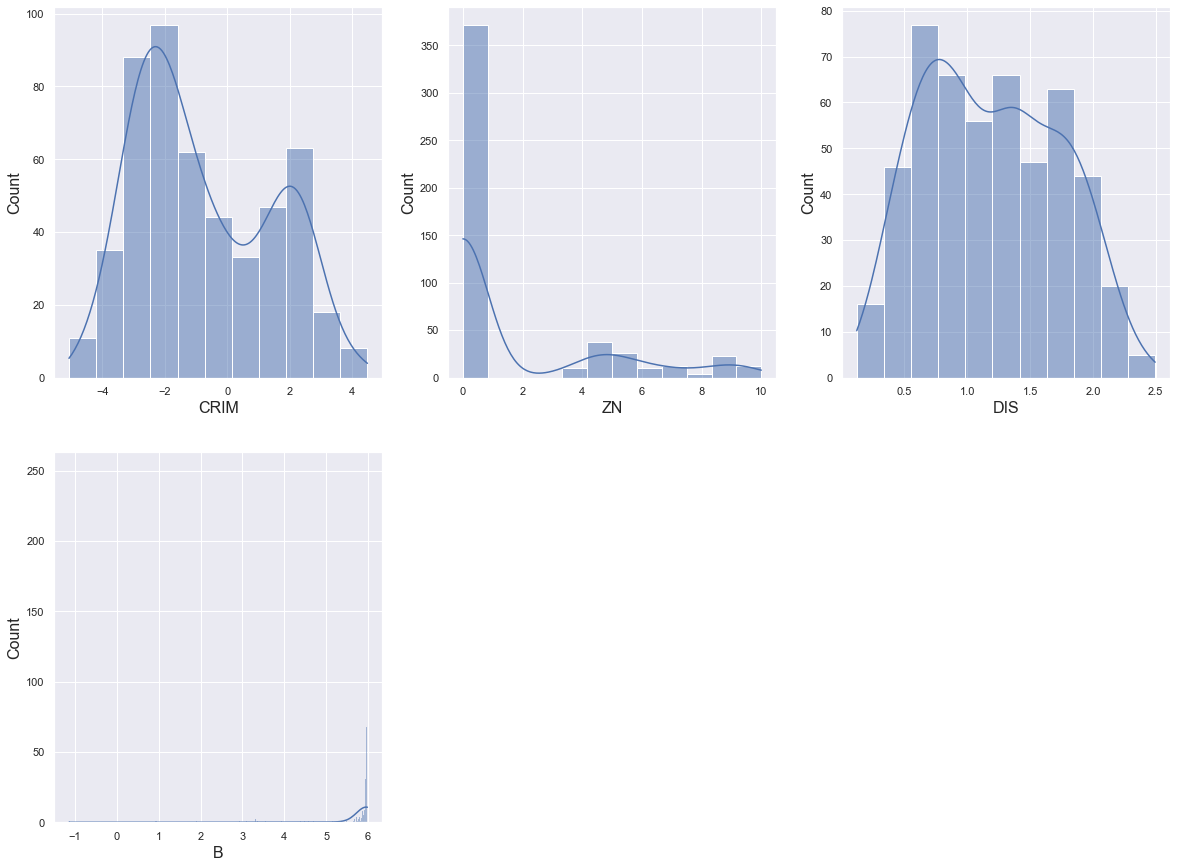

In [9]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in ['CRIM', 'ZN', 'DIS', 'B']:
    ax = plt.subplot(2, 3, plotnumber)
    sns.histplot(data = data_trans[column], stat = 'count', kde = True)
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('Count', fontsize = 16)
    plotnumber += 1
plt.show()

There are some improvements in the above distributions but the variable `B` still looks the same. This may be the result of outliers.

Let us check for outliers in our data using boxplots.

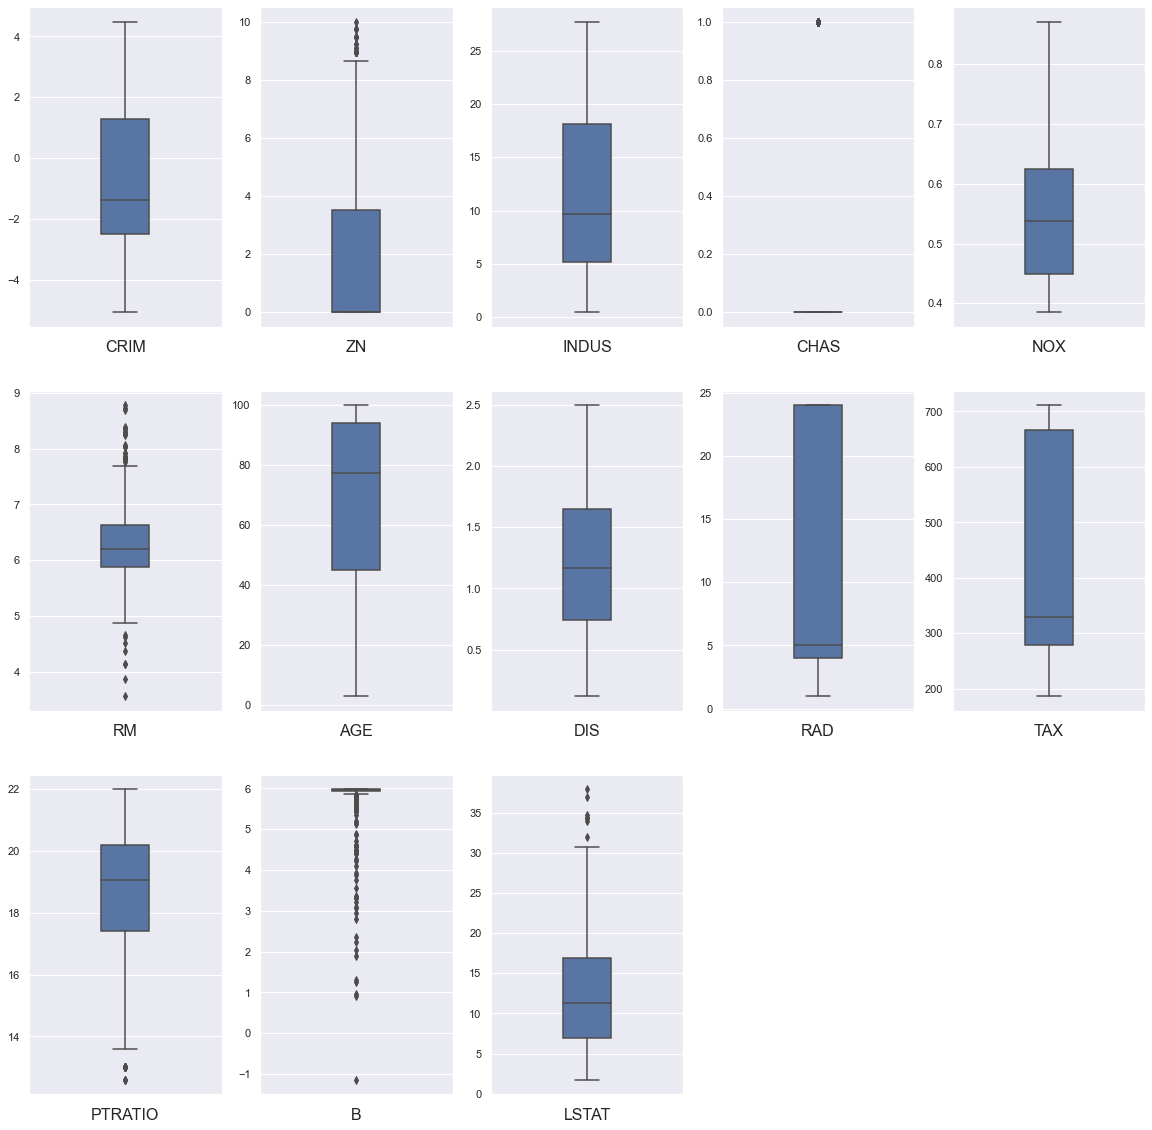

In [10]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in data_trans.columns[:-1]:
    ax = plt.subplot(3, 5, plotnumber)
    sns.boxplot(y = data_trans[column], width = 0.25)
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('')
    plotnumber += 1
plt.show()

Many of the given variables suffer from outliers.

We can calculate the number of outliers per column using the Inter-Quartile Range (IQR) as follows:

In [11]:
dt_q25 = data_trans.quantile(0.25)
dt_q75 = data_trans.quantile(0.75)
IQR = dt_q75 - dt_q25
is_Outlier = (data_trans < (dt_q25 - 1.5 * IQR)) | (data_trans > (dt_q75 + 1.5 * IQR))
is_Outlier = is_Outlier.drop(columns='MEDV')
num_Outliers = is_Outlier.sum()
num_Outliers

CRIM        0
ZN         29
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO    15
B          78
LSTAT       7
dtype: int64

From above, we can observe that out of 13 variables, 6 have outliers.

The variable `B` has the most outliers, followed by the variable `CHAS` and then `RM` and `ZN` respectively.

On careful consideration, we have decided to drop the variables `B` and `CHAS` completely (due to high fraction of outliers), while for the remaining variables we will remove the observations having outliers in any of their column.

In [12]:
data_out_rem = data_trans.drop(columns = ['B', 'CHAS'])
data_out_rem = data_out_rem[~is_Outlier.drop(columns=['B', 'CHAS']).any(axis = 1)]
data_out_rem

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-5.064036,4.242641,2.31,0.538,6.575,65.2,1.408545,1.0,296.0,15.3,4.98,24.0
1,-3.600502,0.000000,7.07,0.469,6.421,78.9,1.602836,2.0,242.0,17.8,9.14,21.6
2,-3.601235,0.000000,7.07,0.469,7.185,61.1,1.602836,2.0,242.0,17.8,4.03,34.7
3,-3.430523,0.000000,2.18,0.458,6.998,45.8,1.802073,3.0,222.0,18.7,2.94,33.4
4,-2.672924,0.000000,2.18,0.458,7.147,54.2,1.802073,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.000000,11.93,0.573,6.593,69.1,0.907694,1.0,273.0,21.0,9.67,22.4
502,-3.095111,0.000000,11.93,0.573,6.120,76.7,0.827460,1.0,273.0,21.0,9.08,20.6
503,-2.800824,0.000000,11.93,0.573,6.976,91.0,0.773574,1.0,273.0,21.0,5.64,23.9
504,-2.211009,0.000000,11.93,0.573,6.794,89.3,0.870833,1.0,273.0,21.0,6.48,22.0


We have **438 rows** remaining and have droped a total of **68 rows**.

Let us look at the relationship between the dependent and independent variables.

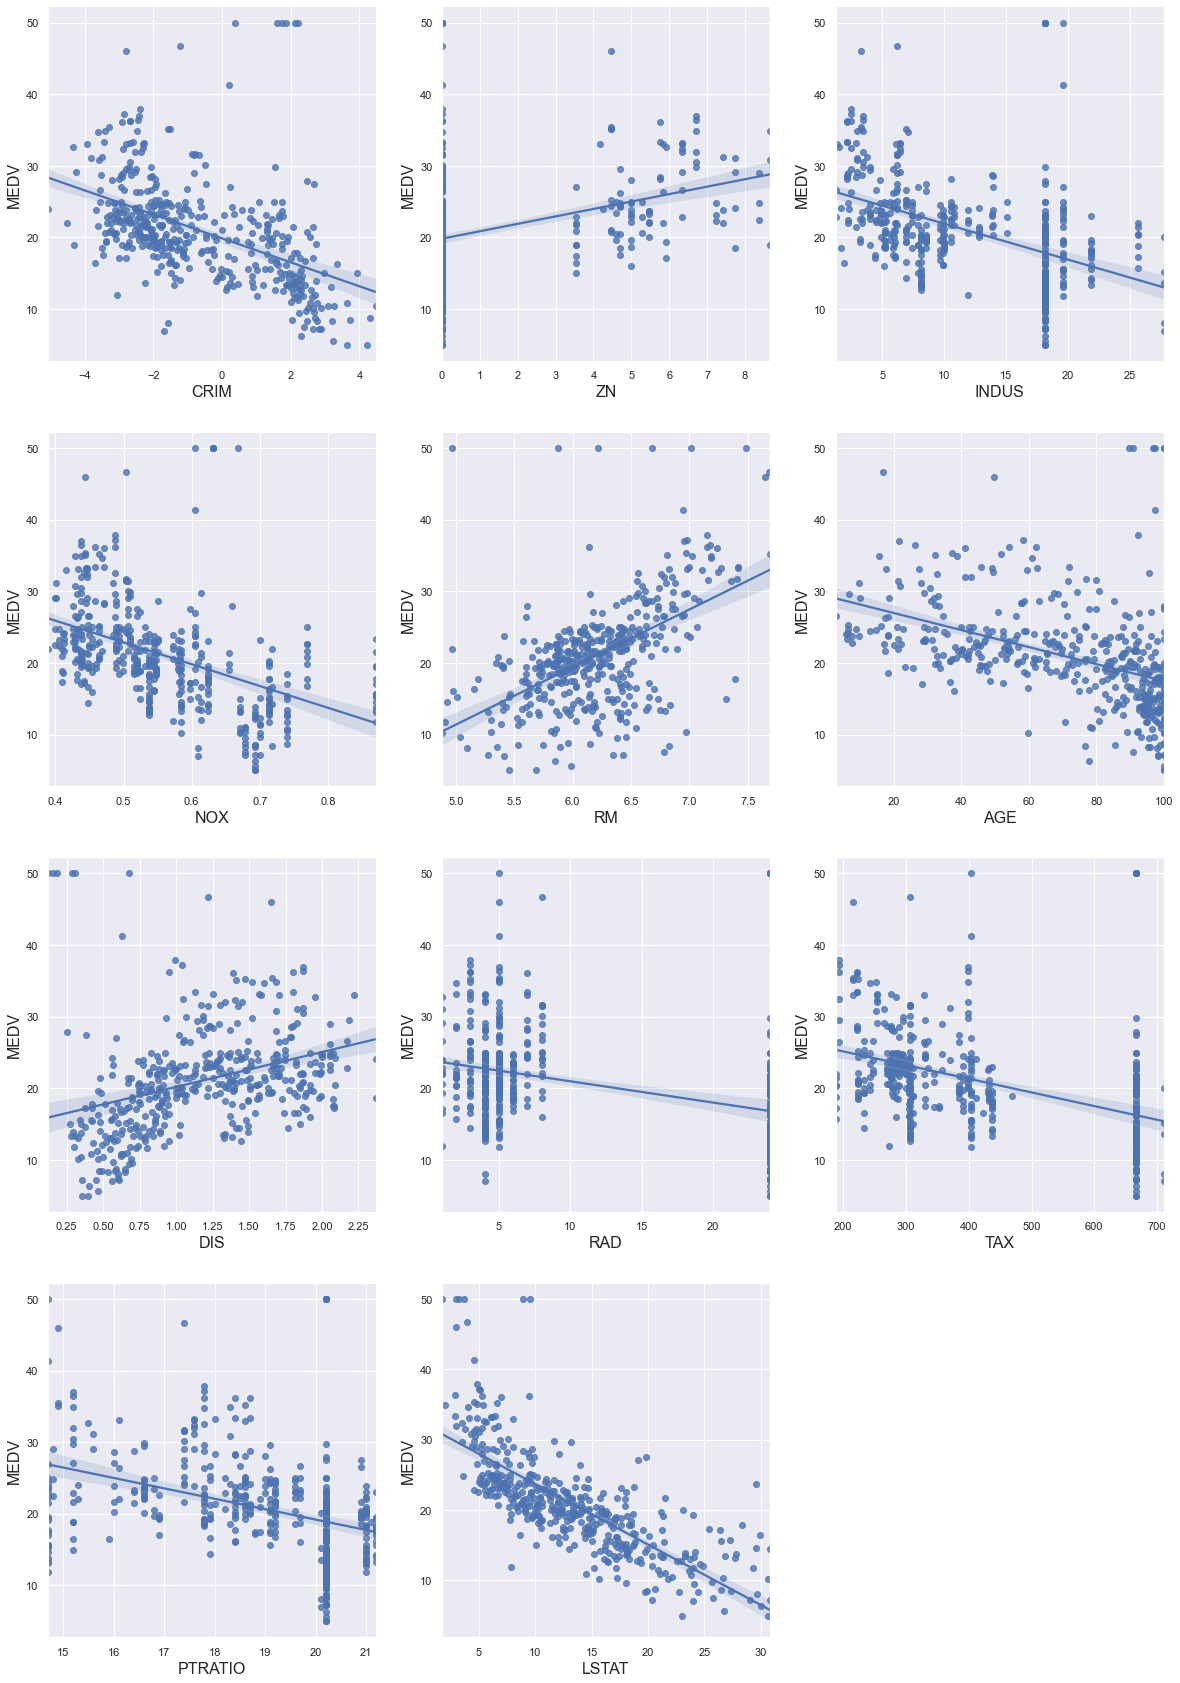

In [13]:
plt.figure(figsize = (20, 30))
plotnumber = 1
for column in data_out_rem.columns[:-1]:
    ax = plt.subplot(4, 3, plotnumber)
    sns.regplot(x = data_out_rem[column], y = data_out_rem['MEDV'])
    plt.xlabel(column, fontsize = 16)
    plt.ylabel('MEDV', fontsize = 16)
    plotnumber += 1
plt.show()

The relationship between the dependent and independent variables look fairly linear.

Now, let us check for multicollinearity between the independent variables. For this, we can either use the Variance Inflation Factor (VIF) or the Correlation Matrix. We will first calculate VIF.

In [14]:
scaler = StandardScaler()
variables = scaler.fit_transform(data_out_rem.drop(columns = 'MEDV'))
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = data_out_rem.columns[:-1]
vif

,VIF,Features
0,7.289598,CRIM
1,1.982335,ZN
2,3.769269,INDUS
3,4.604196,NOX
4,1.679936,RM
5,2.877077,AGE
6,4.603866,DIS
7,9.829757,RAD
8,8.445246,TAX
9,1.573490,PTRATIO


The 3 variables `CRIM`, `RAD` and `TAX` have VIF above the threshold value of 5.

We proceed to construct the Correlation Matrix.

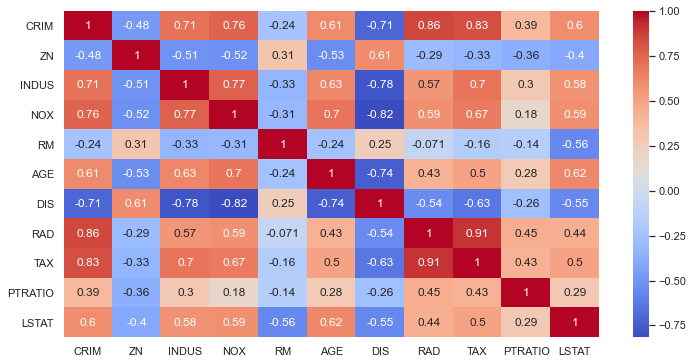

In [15]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(data_out_rem.drop(columns = 'MEDV').corr(), annot = True, cmap = 'coolwarm')
plt.show()

The correlation between the above three variables is also high (above 0.8). This *confirms* multicollinearity.

Now, to remedy this, we drop the variables `RAD` and `TAX`. The resultant data is taken as the input for model development next.

In [16]:
X = data_out_rem.drop(columns = ['RAD', 'TAX', 'MEDV'])
y = data_out_rem['MEDV']

Let us split the data into the training and testing set.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

Fit a regression model.

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

The Coefficients and the Intercept are given below:

In [19]:
lr.coef_

array([ 8.73263501e-02,  7.99915048e-02, -6.49971078e-02, -1.77919217e+01,
        2.75013710e+00,  4.32878531e-03, -5.60819525e+00, -8.14822121e-01,
       -7.26537354e-01])

In [20]:
lr.intercept_

45.71745094413047

The $R^2$ score for the training and the testing data are as follows:

In [21]:
lr.score(X_train, y_train)

0.6524058018449956

In [22]:
lr.score(X_test, y_test)

0.6493269815968351

Hence, the model explains approximately 65% of the data.

Now, we proceed with feature selection.

In [23]:
lr2 = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + PTRATIO + LSTAT',
              data = X.join(y)).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     90.13
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           4.61e-93
Time:                        17:07:07   Log-Likelihood:                -1265.5
No. Observations:                 438   AIC:                             2551.
Df Residuals:                     428   BIC:                             2592.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.3659      5.585      8.480      0.000      36.388      58.344
CRIM           0.0015      0.179      0.008      0.993      -0.351       0.354
ZN             0.0510      0.121      0.423      0.672      -0.186       0.288
INDUS         -0.0642      0.057     -1.126      0.261      -0.176       0.048
NOX          -18.2640      3.925     -4.653      0.000     -25.978     -10.549
RM             2.3977      0.536      4.477      0.000       1.345       3.450
AGE           -0.0038      0.013     -0.295      0.768      -0.029       0.022
DIS           -5.6085      0.883     -6.350      0.000      -7.345      -3.872
PTRATIO       -0.7697      0.130     -5.932      0.000      -1.025      -0.515
LSTAT         -0.6888      0.053    -13.049      0.000      -0.793      -0.585
==============================================================================
Omnibus:                      179.087   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1080.398
Skew:                           1.650   Prob(JB):                    2.48e-235
Kurtosis:                       9.951   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ score and the Adjusted $R^2$ score are given below:

In [24]:
lr2.rsquared

0.654614323987863

In [25]:
lr2.rsquared_adj

0.6473515410810657

And, the p-values are:

In [26]:
lr2.pvalues

Intercept    3.679351e-16
CRIM         9.933124e-01
ZN           6.723491e-01
INDUS        2.608546e-01
NOX          4.360911e-06
RM           9.727923e-06
AGE          7.682475e-01
DIS          5.507199e-10
PTRATIO      6.194113e-09
LSTAT        5.325199e-33
dtype: float64

Looking at the p-values, we are unable to reject the null hypothesis for the features `CRIM`, `ZN`, `INDUS` and `AGE`. Hence, these features are dropped.

Let us generate another model with the remaining features:

In [27]:
lr3 = smf.ols(formula = 'MEDV ~ NOX + RM + DIS + PTRATIO + LSTAT',
              data = X.join(y)).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           5.31e-97
Time:                        17:07:07   Log-Likelihood:                -1266.3
No. Observations:                 438   AIC:                             2545.
Df Residuals:                     432   BIC:                             2569.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0403      5.013      9.383      0.000      37.186      56.894
NOX          -19.8122      3.341     -5.930      0.000     -26.379     -13.245
RM             2.4667      0.509      4.849      0.000       1.467       3.466
DIS           -5.0694      0.734     -6.903      0.000      -6.513      -3.626
PTRATIO       -0.8076      0.117     -6.888      0.000      -1.038      -0.577
LSTAT         -0.6981      0.048    -14.636      0.000      -0.792      -0.604
==============================================================================
Omnibus:                      181.170   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1099.152
Skew:                           1.671   Prob(JB):                    2.10e-239
Kurtosis:                      10.004   Cond. No.                         630.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The new $R^2$ score and the Adjusted $R^2$ score are given below:

In [28]:
lr3.rsquared

0.6533418358350485

In [29]:
lr3.rsquared_adj

0.6493295885646208

The above scores are the same as previous model. Hence, this model is appropriate.

But, there is a possibility that our model may overfit the data. To test this, we will use regularization.

In [30]:
X_new = X.drop(columns = ['CRIM', 'ZN', 'INDUS', 'AGE'])
y_new = y

Let us split the data into the training and testing set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 123)

Fit a regression model.

In [32]:
lr4 = LinearRegression()
lr4.fit(X_train, y_train)

LinearRegression()

The Coefficients and the Intercept are given below:

In [33]:
lr4.coef_

array([-18.14054614,   2.92746627,  -5.24439298,  -0.83412275,
        -0.71975471])

In [34]:
lr4.intercept_

44.22156861224383

The $R^2$ score for the training and the testing data are as follows:

In [35]:
lr4.score(X_train, y_train)

0.6508668317366717

In [36]:
lr4.score(X_test, y_test)

0.6509703065468275

First, we will use the **LASSO** or **L1** regularization.

In [37]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True, random_state = 123)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

0.0003126619371605995

In [38]:
lasso_reg = Lasso(lasso_cv.alpha_, random_state = 123)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0003126619371605995, random_state=123)

The $R^2$ score for the training and the testing data are as follows:

In [39]:
lasso_reg.score(X_train, y_train)

0.650866235355762

In [40]:
lasso_reg.score(X_test, y_test)

0.6509099207429638

These scores are same as before.

Next, we will use the **Ridge** or **L2** regularization.

In [41]:
alphas = np.random.uniform(low = 0, high = 10, size = (50, ))
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.22359116531790457

In [42]:
ridge_reg = Ridge(alpha = ridge_cv.alpha_, random_state = 123)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.22359116531790457, random_state=123)

The $R^2$ score for the training and the testing data are as follows:

In [43]:
ridge_reg.score(X_train, y_train)

0.6503307583148932

In [44]:
ridge_reg.score(X_test, y_test)

0.6472838276868805

These scores are also the equal to the scores without regularization.

Lastly, we will use the **Elastic Net** regularization.

In [45]:
elastic_CV = ElasticNetCV(alphas = None, cv = 10, random_state = 123)
elastic_CV.fit(X_train, y_train)
elastic_CV.alpha_

0.07252051578301603

In [46]:
elastic_CV.l1_ratio

0.5

In [47]:
elastic_reg = ElasticNet(alpha = elastic_CV.alpha_, l1_ratio = elastic_CV.l1_ratio, random_state = 123)
elastic_reg.fit(X_train, y_train)

ElasticNet(alpha=0.07252051578301603, random_state=123)

The $R^2$ score for the training and the testing data are as follows:

In [48]:
elastic_reg.score(X_train, y_train)

0.6270839477743695

In [49]:
elastic_reg.score(X_test, y_test)

0.6180245214482405

Hence, even with different regularization techniques, we get the same $R^2$ score. Therefore, our model is well trained over the data and there is no overfitting.

In conclusion, we have developed a linear regression model between the dependent variable `MEDV` and the independent variables `NOX`, `RM`, `DIS`, `PTRATIO` and `LSTAT`. The relationship is as given below:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \beta_5x_5$$
or
$$y = 41.86 - 15.34x_1 + 2.94x_2 - 4.78x_3 - 0.82x_4 - 0.73x_5$$

where, $y$ - MEDV  
$x_1$ - NOX  
$x_2$ - RM  
$x_3$ - DIS  
$x_4$ - PTRATIO  
$x_5$ - LSTAT  
$\beta_0$ - Intercept  
$\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$ and $\beta_5$ - Coefficients

The values of the coefficients and the intercept is from the regression using *ridge regularization*.